# Lecture 2: word vector representation 

In [2]:
import nltk
import random
import string
import operator
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import LinearSVC
from tqdm import tqdm

%matplotlib inline

In [ ]:
nltk
tqdm
numpy
sklearn
matplotlib

## Exercise 1: tokenization

In this exercise you define a couple of tokenizers and use them on a toy sentence

In [3]:
test_sentence_1 = 'The quick brown fox jumps over the lazy dog.'

### 1.1 - delimiter tokenization

In [4]:
def tokenize_by_split(text):
    """Tokenizes a given string of text by splitting words by whitespace"""
    # your code goes here
    tokens = text.split()
    return tokens

In [5]:
assert tokenize_by_split(test_sentence_1) == ['The', 'quick', 'brown', 'fox', 
                                              'jumps', 'over', 'the', 'lazy', 'dog.']
print('done')

done


### 1.2 - removing punctuation

In [6]:
def remove_punkt_and_tokenize_by_split(text):
    """Replaces punktuation from given string of text with whitespace, then
    tokenizes it by splitting words by whitespace"""
    punkt_symbols = string.punctuation
    # your code goes here
    punkt_removed = ''.join([t for t in text if t not in punkt_symbols])
    tokens = punkt_removed.split()
    return tokens

In [7]:
assert remove_punkt_and_tokenize_by_split(test_sentence_1) == ['The', 'quick', 'brown', 'fox', 
                                                               'jumps', 'over', 'the', 'lazy', 'dog']
print('done')

done


### 1.3 - using regular expression

In [8]:
test_sentence_2 = "This is a test that isn't so simple: 1.23"

In [9]:
def tokenize_by_regex(text):
    """Tokenizes a given string of text by applying the 'tokenize' method 
    of the provided 'tokenizer' object"""
    tokenizer = nltk.RegexpTokenizer('\w+')
    # your code goes here
    tokens = tokenizer.tokenize(text)
    return tokens

In [10]:
assert tokenize_by_regex(test_sentence_2) == ['This', 'is', 'a', 'test', 'that', 
                                              'isn', 't', 'so', 'simple', '1', '23']
print('done')

done


### 1.4 - using an advanced tokenizer model

In [10]:
# download the PUNKT tokenizer model
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/denisantyukhov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def tokenize_by_punkt_model(text):
    """Tokenizes a given string of text by applying the NLTK Punkt tokenizer model.
    Uses nltk.word_tokenize method"""
    # your code goes here
    tokens = nltk.word_tokenize(text)
    return tokens

In [12]:
assert tokenize_by_punkt_model(test_sentence_2) == ['This', 'is', 'a', 'test', 'that', 
                                                    'is', "n't", 'so', 'simple', ':', '1.23']
print('done')

done


## Exercise 2: n-grams and stopwords

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. First of all, let's get it!

In [14]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/denisantyukhov/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

The Brown corpus contains texts from different categories

In [15]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Sentences from each category can be accessed as follows

In [13]:
adv_sents = list(nltk.corpus.brown.sents(categories='adventure'))
print(len(adv_sents))

4637


In [14]:
adv_sents[:2]

[['Dan',
  'Morgan',
  'told',
  'himself',
  'he',
  'would',
  'forget',
  'Ann',
  'Turner',
  '.'],
 ['He', 'was', 'well', 'rid', 'of', 'her', '.']]

Let's see what are the most frequent unigrams in the 'adventure' category

In [15]:
# joins a list of lists of tokens into a one large string of text
adventure_text = ' '.join(list(itertools.chain.from_iterable(adv_sents)))

In [16]:
# uses the tokenizer function we've just written to tokenize text
adventure_tokens = tokenize_by_regex(adventure_text)

In [17]:
# turns each token to lowercase (simple normalization technique)
lowered_tokens = [token.lower() for token in adventure_tokens]
print(len(lowered_tokens))

60004


In [18]:
# counts the number of occurances for each unigram
word_counter = collections.Counter(lowered_tokens)

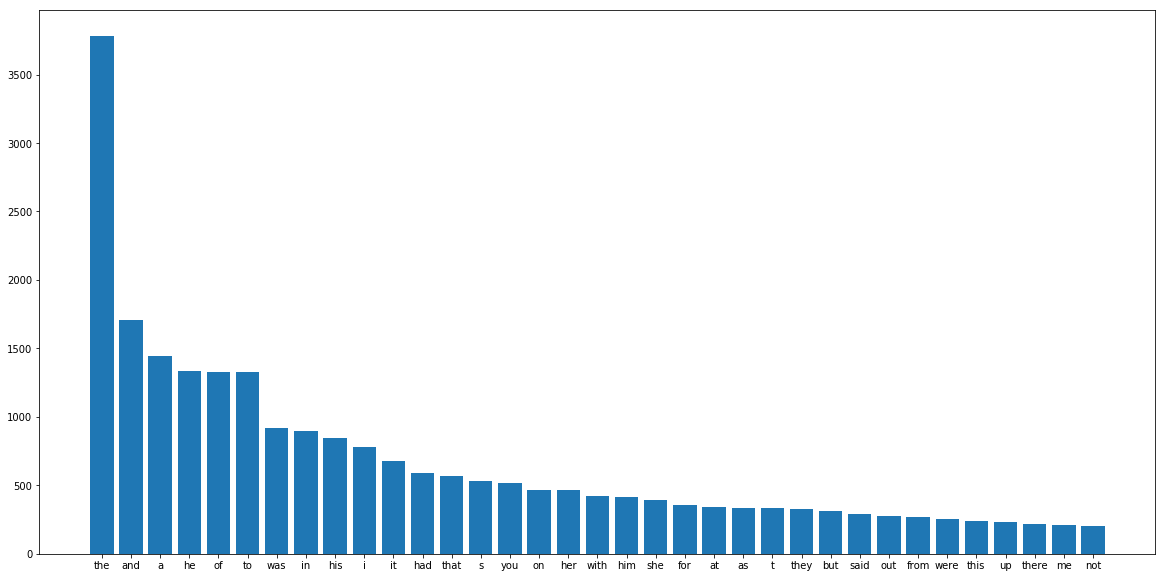

In [20]:
labels = [w[0] for w in word_counter.most_common(35)]
values = [w[1] for w in word_counter.most_common(35)]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,10))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

We notice that some of the most common words above are not very interesting!

### stop-words

In this exersise you remove stopwords, find the most frequent bigrams, then display them on a barplot

In [23]:
# get the list of english stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/denisantyukhov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(stopwords))

153


### 2.1 - filtering stop-words

In [22]:
# remove stopwords from the list of 'lowered_tokens'
# your code goes here
stopword_filtered_tokens = [tok for tok in lowered_tokens if tok not in stopwords]

### 2.2 - getting the bigrams

In [23]:
# turn your filtered list of unigrams into a list of bigrams, joint by whitespace
# to achieve that, use the function nltk.ngrams(your_tokens, 2)
# your code goes here
filtered_bigrams = [' '.join(bigram) for bigram in list(nltk.ngrams(stopword_filtered_tokens, 2))]

### 2.3 - counting occurances

In [24]:
# now count the occurances of bigrams using a new Counter instance
# your code goes here
bigram_counter = collections.Counter(filtered_bigrams)

assert {'miss langford', 'mary jane', 'billy tilghman'}.issubset(set(map(operator.itemgetter(0), 
                                                                         bigram_counter.most_common(15))))
print('done')

done


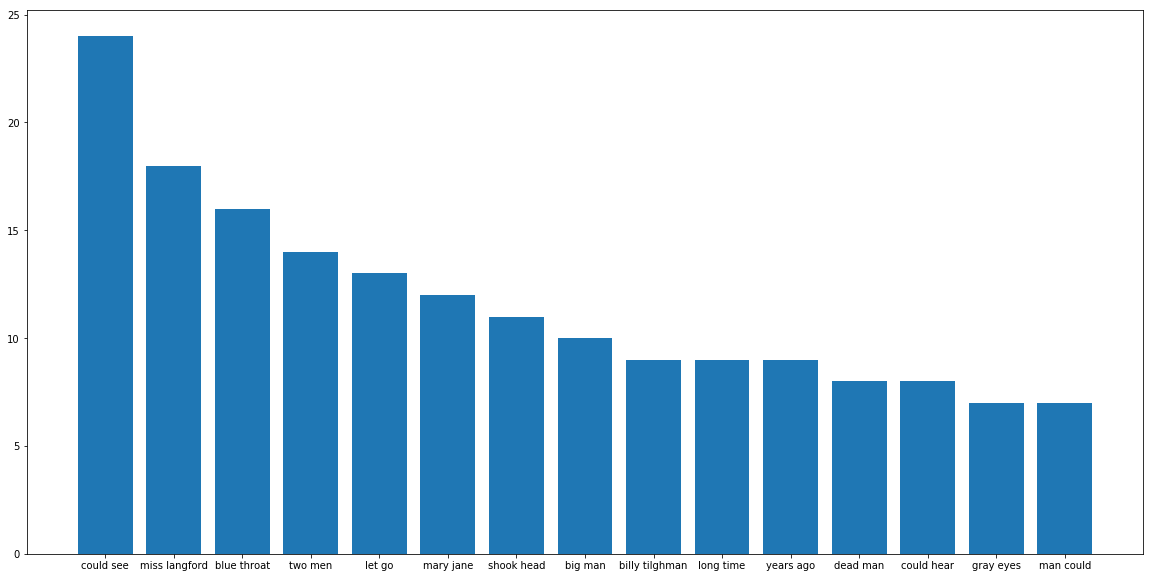

In [25]:
labels = [w[0] for w in bigram_counter.most_common(15)]
values = [w[1] for w in bigram_counter.most_common(15)]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,10))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

## Exercise 3: vocabularies

In this exercise you write a function that builds a vocabulary from the provided text corpus. Then you use it to encode tokens into numeric form

### 3.1 - building a vocabulary

In [29]:
def build_vocabulary(tokens, max_size):
    """
    Builds a dictionary of at most max_size most frequent tokens from the supplied list of tokens.
    More frequent tokens should have a lower id, but that is not strictly required.
    Two special symbols 'NULL':0 and 'UNKN':1 should also be added to the dictionary.
    
    EXAMPLE:
    {
        'NULL': 0,
        'UNKN': 1,
        'the': 2,
        'and': 3,
        'a': 4,
        ...
    }
    """
    vocabulary = {}
    reserved_symbols = ["NULL", "UNKN"]
    
    # your code goes here

    return vocabulary

In [163]:
def build_vocabulary(tokens, max_size=20000):
    """
    Builds a vocabulary of at most max_size words from the supplied list of lists of tokens.
    If a word embedding model is provided, adds only the words present in the model vocabulary.
    """
    vocabulary = {}
    reserved_symbols = ["NULL", "UNKN"]
    
    counter = collections.Counter(tokens)
    
    freq_toks = counter.most_common(max_size-len(reserved_symbols))

    voc_words = [k[0] for k in freq_toks]

    for i, reserved in enumerate(reserved_symbols):
        vocabulary[reserved] = i

    for i, k in enumerate(voc_words):
        vocabulary[k] = i+len(reserved_symbols)

    return vocabulary

In [164]:
VOC_SIZE = 5000

my_vocabulary = build_vocabulary(lowered_tokens, VOC_SIZE)

assert len(my_vocabulary) == VOC_SIZE
assert {'NULL', 'UNKN'}.issubset(set(my_vocabulary.keys()))
assert set([w[0] for w in word_counter.most_common(VOC_SIZE-10)]).issubset(set(my_vocabulary.keys()))
print('done')

done


### 3.2 - encoding tokens

In [151]:
def vectorize_tokens(sentence, tokenizer, token_to_id, max_len):
    """
    Converts a list of tokens to a list of token ids using the supplied dictionary.
    Pads resulting list with NULL identifiers up to max_len length.
    """
    # your code goes here
    # STEP 1: convert sentence to a list of tokens
    tokens = tokenizer(sentence)
    ids = []
    
    # STEP 2: replace tokens with their identifiers from the vocabulary
    # If the token is not present in the vocabulary, replace it with UNKN identifier
    for token in tokens:
        ids.append(token_to_id.get(token, token_to_id["UNKN"]))

    # STEP 3: pad the sequence id's with NULL identifiers until so that it's length is equal to max_len
    if len(ids) < max_len:
        ids += (max_len-len(ids))*[token_to_id["NULL"]]
    else:
        ids = ids[:max_len]

    return ids

In [154]:
MAX_LEN = 16
test_sentence = 'The animals thundered away into the moonlight , heading for the ridges .'
vectorized = vectorize_tokens(test_sentence,
                              tokenize_by_regex, my_vocabulary, MAX_LEN)

assert len(vectorized) == MAX_LEN
assert [my_vocabulary.get(t, my_vocabulary['UNKN']) 
        for t in tokenize_by_regex(test_sentence)] + [0]*(MAX_LEN-len(tokenize_by_regex(test_sentence))) == vectorized

### Exercise 4: one-hot encoding

In this exercise you create a function to compute sentence similarity, then build a simple Information Retrieval system

In [32]:
VOC_SIZE = 5000

adv_brown_sents = [' '.join(sent) for sent in nltk.corpus.brown.sents(categories='adventure')]
print(len(adv_brown_sents))

4637


In [33]:
# initialize the CountVectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=VOC_SIZE, stop_words=stopwords, lowercase=True)

In [34]:
# builds the vocabulary from the data
tfidf_vectorizer.fit(adv_brown_sents)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'i', 'having', 'their', 'them', 'than', 'be', 'above', 'if', 'y', 'couldn', 've', 'itself', 'hers', 'm', 'haven', 'won', 'under', 'had', 'against', 'most', 'should', 'needn', 'ours', 'him', 'does', 'has', 'between', 'why', 'other', 'into', 'hasn', 'shouldn', 'theirs', 'all', 'they', 'don...', 'about', 'yourselves', 'me', 'each', 'any', 'now', 'from', 'am', 'until', 'both', 'while', 'can'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [35]:
tfidf_vectorizer_vocab = dict(zip(range(len(tfidf_vectorizer.get_feature_names())),
                                  tfidf_vectorizer.get_feature_names()))

In [37]:
# applies one-hot encoding to the provided data, transforming sentences into vectors
vectorized_sents = tfidf_vectorizer.transform(adv_brown_sents)

# the resulting matrix has shape (N_SAMPLES x VOC_SIZE)
vectorized_sents.shape

(4637, 5000)

Let's have a look at the sentence vector

In [38]:
# sentence
print(adv_brown_sents[0])

Dan Morgan told himself he would forget Ann Turner .


In [39]:
# sentence vector is almost all zeroes
print(vectorized_sents[0].toarray())

[[ 0.  0.  0. ...,  0.  0.  0.]]


In [40]:
# nonzero elements of the sentence vector
print(vectorized_sents[0].nonzero()[1])

[4932 4389 4251 2021 1219  751  102]


In [41]:
# the words are the same, but the word order is lost, and stopwords are removed
[tfidf_vectorizer_vocab[wid] for wid in vectorized_sents[0].nonzero()[1]]

['would', 'turner', 'told', 'morgan', 'forget', 'dan', 'ann']

In [42]:
# we can now compute the similarity between sentences like so:
sent1vector = vectorized_sents[0]
sent10vector = vectorized_sents[10]
similarity = cosine_similarity(sent1vector, sent10vector)
print(similarity)

[[ 0.20980297]]


### 4.1 - sentence similarity

In [43]:
def onehot_sentence_similarity(sent1, sent2, vectorizer):
    """Encodes provided sentences using the 'vectorizer' object,
    then computes the cosine similarity between sentence vectors
    Outputs a real number between [0,1] """
    
    # CountVectorizer requires a list of sentences as input
    sent1 = [sent1]
    sent2 = [sent2]
    
    # your code goes here
    vec1 = vectorizer.transform(sent1)
    vec2 = vectorizer.transform(sent2)
    similarity = cosine_similarity(vec1, vec2)
    
    return similarity

In [48]:
test_sentence_1 = 'I like building robots'
test_sentence_2 = 'I also like building pillow fortresses'

In [53]:
assert onehot_sentence_similarity(test_sentence_1, test_sentence_2, tfidf_vectorizer) > 0.5
print('done')

done


### 4.2 - information retrieval

In [107]:
class SearchEngine(object):
    def __init__(self, knowledge_base, voc_size=5000):
        """
        Implements a simple information retrieval system based on Tf-Idf text representation.
        """
        
        self.kbase = np.array(knowledge_base)
        self.vectorizer = TfidfVectorizer(max_features=voc_size)
        self.vectorized_kbase = self.vectorizer.fit_transform(knowledge_base)
        
    def search(self, query, top_k=3):
        """
        Retrieves the top-k documents from the knowledge_base most similar to given query
        """
        
        vectorized_query = self.vectorizer.transform([query])
        
        # your code goes here
        # STEP 1: compute similarities between query and all documents in knowledge base
        sims = cosine_similarity(vectorized_query, self.vectorized_kbase)[0]

        # STEP 2: sort the similarities to find most similar document indices
        # HINT: use np.argsort to do that
        # your code goes here
        sorted_sims = np.argsort(-sims)
        topk_ids = sorted_sims[:top_k]
        
        # STEP 3: gets top-k most similar documents from self.kbase, returns them
        return self.kbase[topk_ids]
        

In [108]:
se = SearchEngine(adv_brown_sents)

In [169]:
query1 = 'take it easy'
result1 = se.search(query1, top_k=1)[0]
assert query1 in result1

query2 = 'uneasy feeling'
result2 = se.search(query2, top_k=1)[0]
assert query2 in result2

print('done')

done


### Exercise 5: language models

In [26]:
model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
 
for sentence in tqdm(nltk.corpus.brown.sents()):
    for w1, w2, w3 in nltk.trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1

for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

100%|██████████| 57340/57340 [00:12<00:00, 4679.75it/s]


In [29]:
model[('back', 'window')]

defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
            {'and': 0.5, 'glass': 0.5})

In [30]:
text = [None, None]
 
sentence_finished = False
 
while not sentence_finished:
    r = random.random()
    accumulator = .0
 
    for word in model[tuple(text[-2:])].keys():
        mdw = model[tuple(text[-2:])][word]
        accumulator += mdw
        #print(mdw, accumulator, r)
        if accumulator >= r:
            text.append(word)
            break
 
    if text[-2:] == [None, None]:
        sentence_finished = True

print(' '.join([t for t in text if t]))

When she appeared at the expense of the special features of religion , which would delay the proposed presidential aide , one for the Church points its fingers at their heyday and when this occurred the country .


In [31]:
import pandas as pd

In [32]:
sp = pd.read_csv("/Users/denisantyukhov/Downloads/All-seasons.csv")

In [37]:
sptoks = [tokenize_by_punkt_model(t) for t in tqdm(sp['Line'].tolist())]

100%|██████████| 70896/70896 [00:28<00:00, 2447.66it/s]


In [38]:
model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
 
for sentence in tqdm(sptoks):
    for w1, w2, w3, w4 in nltk.ngrams(sentence, 4, pad_right=True, pad_left=True):
        model[(w1, w2, w3)][w4] += 1

for w1_w2_w3 in model:
    total_count = float(sum(model[w1_w2_w3].values()))
    for w4 in model[w1_w2_w3]:
        model[w1_w2_w3][w4] /= total_count

100%|██████████| 70896/70896 [00:08<00:00, 8513.19it/s] 


In [46]:
text = [None, None, None]
 
sentence_finished = False
 
while not sentence_finished:
    r = random.random()
    accumulator = .0
 
    for word in model[tuple(text[-3:])].keys():
        mdw = model[tuple(text[-3:])][word]
        accumulator += mdw
        #print(mdw, accumulator, r)
        if accumulator >= r:
            text.append(word)
            break
 
    if text[-3:] == [None, None, None]:
        sentence_finished = True

print(' '.join([t for t in text if t]))

That was very good , Eric .
